R²: 0.86
RMSE: 328.25


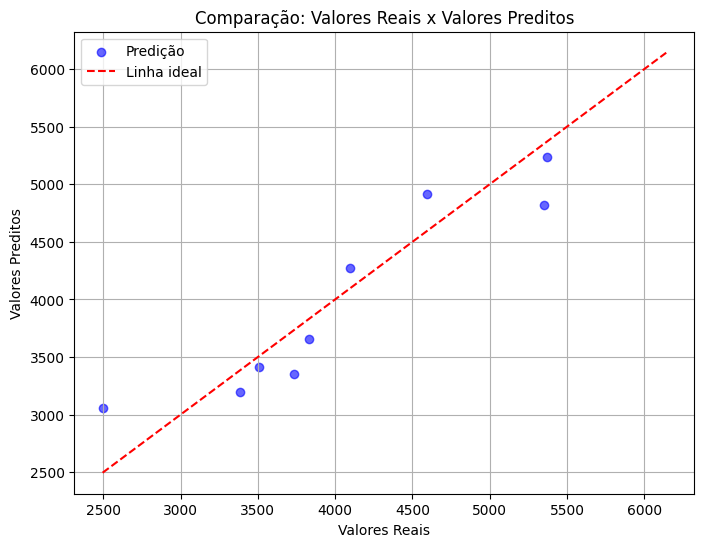

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt  # import para gráficos

# Carregar dados
df = pd.read_csv('../data/dataset.csv')

# Limpeza de dados
df = df.dropna()

# Codificação de variáveis categóricas
df['sexo'] = df['sexo'].astype('category').cat.codes
df['escolaridade'] = df['escolaridade'].astype('category').cat.codes

# Seleção de variáveis
X = df[['idade', 'experiencia', 'sexo', 'escolaridade']]
y = df['salario']

# Separação treino/teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criação do modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Predição
y_pred = model.predict(X_test)

# Avaliação
r2 = r2_score(y_test, y_pred)
rmse = sqrt(mean_squared_error(y_test, y_pred))

print(f'R²: {r2:.2f}')
print(f'RMSE: {rmse:.2f}')

# Gráfico: valores reais x preditos
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue', label='Predição')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', label='Linha ideal')
plt.xlabel('Valores Reais')
plt.ylabel('Valores Preditos')
plt.title('Comparação: Valores Reais x Valores Preditos')
plt.legend()
plt.grid(True)
plt.show()
